# Scaling data for thin sections

The particle-size distribution of a tuffisite sample can be made more representative by combining particle-size distributions for individual subunits within a sample.

This code requires area data for each subunit with a thin section to scale the particle-size distributions (after Farquharson & Wadsworth, 2018). See the example file 'DM9B_section_areas.csv'.

The code also requires the particle-size distribution outputs generated previously by Fixed_bins_controller.ipynb. These should all be contained within a single folder (e.g. DM9B_section_areas).

In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import math
import openpyxl
from Particle_functions_area_fixedbins import bin_creator
from glob import glob
import os

In [3]:
# Smallest bin size to consider
bin_min_size = 0.1

# Multiplier to produce bins
bin_multiplier = 0.2

# Total number of particles included before and after filtering
total_particles_raw = 1821
total_particles_used = 1376

# Name of .csv file containing the area 
# data for the thin section and the folder containing 
# the outputs from Fixed_bins_controller
area_csv = 'DM11B_section_areas'

# Reads the .csv file
section_areas = pd.read_csv(f"{area_csv}.csv")

# Checks if output folder exists in current directory
if not os.path.exists(f'{area_csv}_output'): 
    # If does not exist, makes folder
    os.makedirs(f'{area_csv}_output') 
    
section_areas

,Names,Area,Mean,Min,Max
0,DM11B_24-26_data,760807.475,255,255,255
1,DM11B_55-57_data,238570.057,255,255,255


In [4]:
# Creates an empty dataframe to hold the data
all_vol = pd.DataFrame(index = range(100))

for name in section_areas["Names"]:
    # Reads all .csv files from the folder 
    file_load = pd.read_csv(f'{name}/Output/{name}_stereo.csv') 
    all_vol[f"{name} bins lower"] = file_load["Radius (bins lower)"]
    all_vol[f"{name} bins upper"]  = file_load["Radius (bins upper)"]
    all_vol[f"{name} volume fraction"]=file_load["Volume fraction"]

#  Removes all NaNs from the data
all_vol.dropna(how='all')
all_vol.head()

,DM11B_24-26_data bins lower,DM11B_24-26_data bins upper,DM11B_24-26_data volume fraction,DM11B_55-57_data bins lower,DM11B_55-57_data bins upper,DM11B_55-57_data volume fraction
0,44.815172,56.418958,0.043943,8.941802,11.257062,0.021185
1,35.597956,44.815172,0.130653,7.102726,8.941802,0.035729
2,28.276462,35.597956,0.172008,5.641896,7.102726,0.111018
3,22.460792,28.276462,0.092404,4.481517,5.641896,0.105201
4,17.841241,22.460792,0.106930,3.559796,4.481517,0.098941


In [5]:
# Calculates the area fraction of the thin section 
# composed of each subunit.
areas = section_areas["Area"]/sum(section_areas["Area"])

# Adds the area fraction to the DataFrame
section_areas["Area fraction"] = areas

section_areas

,Names,Area,Mean,Min,Max,Area fraction
0,DM11B_24-26_data,760807.475,255,255,255,0.761281
1,DM11B_55-57_data,238570.057,255,255,255,0.238719


In [6]:
# Creates a new DataFrame to hold the scaled data
scaled_vol = pd.DataFrame(index = range(100))

# Variable to check the area fractions add to 1
total = 0


for index, name in enumerate(section_areas["Names"]):
    
    # Takes the lower bin edges from the all_vol DataFrame and 
    # places into the new scaled_vol DataFrame.
    scaled_vol[f"{name} bins lower"] = \
    all_vol[f"{name} bins lower"]
    
    # Takes the lower bin edges from the all_vol DataFrame and 
    # places into the new scaled_vol DataFrame.
    scaled_vol[f"{name} bins upper"] = \
    all_vol[f"{name} bins upper"]
    
    # Calculates the scaled volume fraction for each subunit.
    scaled_vol[f"{name} scaled volume fraction"] = \
    all_vol[f"{name} volume fraction"] * areas[index]
    
    # Makes an array with the volume fractions to add together 
    to_add = scaled_vol\
    [f"{name} scaled volume fraction"].dropna(how="all")
    
    # Adds the volum fraction together
    total += sum(to_add)

# Checks that the volume fraction adds to 1    
if round(total) == 1:
    print("Data has been successfully scaled to thin section")
else: 
    print("There is an error in scaling, check \
    the names given in the csv file match folder names")

scaled_vol.head(10)

Data has been successfully scaled to thin section


,DM11B_24-26_data bins lower,DM11B_24-26_data bins upper,DM11B_24-26_data scaled volume fraction,DM11B_55-57_data bins lower,DM11B_55-57_data bins upper,DM11B_55-57_data scaled volume fraction
0,44.815172,56.418958,0.033453,8.941802,11.257062,0.005057
1,35.597956,44.815172,0.099464,7.102726,8.941802,0.008529
2,28.276462,35.597956,0.130947,5.641896,7.102726,0.026502
3,22.460792,28.276462,0.070345,4.481517,5.641896,0.025114
4,17.841241,22.460792,0.081404,3.559796,4.481517,0.023619
5,14.171802,17.841241,0.052609,2.827646,3.559796,0.018420
6,11.257062,14.171802,0.049111,2.246079,2.827646,0.010188
7,8.941802,11.257062,0.038283,1.784124,2.246079,0.024146
8,7.102726,8.941802,0.023819,1.417180,1.784124,0.015875
9,5.641896,7.102726,0.024471,1.125706,1.417180,0.011949


In [7]:
# Runs the bin_creator function (see Particle_sorter_worked_example)
bins_df, bins = bin_creator(bin_min_size, bin_multiplier)

In [8]:
# Converts area bins to radius bins
r_bins = (bins_df/math.pi)**0.5
r_bins.head()

,Bins lower,Bins upper
0,0.178412,0.224608
1,0.224608,0.282765
2,0.282765,0.355980
3,0.355980,0.448152
4,0.448152,0.564190


In [9]:
# Creates a new DataFrame to hold data
align = pd.DataFrame()

# Places bins into the new Dataframe in decreasing size

align["Radius bins lower"] = \
(np.flip(r_bins["Bins lower"])).reset_index(drop=True)

align["Radius bins upper"] = \
(np.flip(r_bins["Bins upper"])).reset_index(drop=True)

align["Diameter bins lower"] = \
align["Radius bins lower"]*2

align["Diameter bins upper"] = \
align["Radius bins upper"]*2

align.tail()

,Radius bins lower,Radius bins upper,Diameter bins lower,Diameter bins upper
40,0.448152,0.564190,0.896303,1.128379
41,0.355980,0.448152,0.711959,0.896303
42,0.282765,0.355980,0.565529,0.711959
43,0.224608,0.282765,0.449216,0.565529
44,0.178412,0.224608,0.356825,0.449216


In [10]:
# Creates new empty array
to_fill = []

# Compares the largest bin in each image 
# with those in the align DataFrame to align 
# the data with bin sizes that are offset
for j in range(len(section_areas["Names"])):
    for index, bin in enumerate(align["Radius bins lower"]):
        if round(bin,2) == round(scaled_vol.iat[0,3*j],2):
            
            # Places each index in the to_fill array
            to_fill.append(index)

In [11]:
# Creates an array with the names of each image
names = section_areas["Names"]

# Creates an empty array to hold the volume 
# fractions of each image set in the thin section
fraction_total = []

# For each image set, places the scaled volumme fraction
# into the array fraction_total
for i in range(len(names)):
    
    # Creates an array of zeros with a length equal 
    # to the number of bins in the particle-size distribution 
    # in each image set
    zeros = np.zeros(int(to_fill[i]))
    
    # Adds the scaled volume fraction to an array 
    # so that all data is aligned to the correct bins
    with_zeros = \
    np.append(zeros, scaled_vol[f"{names[i]} scaled volume fraction"])
    
    # Places the data for each image set against 
    # the correct bins in the Dataframe
    align[names[i]] = \
    with_zeros[:len(align["Radius bins lower"])]
    
    # Places the scaled volume fraction for each 
    # image nest in the array
    fraction_total.append(sum(align[names[i]].dropna()))

# Replaces the NaNs in the dataframe with zeros
align = align.fillna(0)

In [12]:
# Creates a new column of zeros in the DataFrame
align["Average"] = np.zeros(len(align))

# Sums the scaled volume fraction for each image 
# nest to give the fraction for the whole thin section
for name in names:
    align["Average"] += align[name]

align.head()

,Radius bins lower,Radius bins upper,Diameter bins lower,Diameter bins upper,DM11B_24-26_data,DM11B_55-57_data,Average
0,4481.517159,5641.895835,8963.034319,11283.791671,0.0,0.0,0.0
1,3559.795614,4481.517159,7119.591228,8963.034319,0.0,0.0,0.0
2,2827.646166,3559.795614,5655.292332,7119.591228,0.0,0.0,0.0
3,2246.079188,2827.646166,4492.158375,5655.292332,0.0,0.0,0.0
4,1784.124116,2246.079188,3568.248232,4492.158375,0.0,0.0,0.0


In [13]:
# Removes the zeros from the align DataFrame
align= align[align['Average'] != 0]
align.head()

,Radius bins lower,Radius bins upper,Diameter bins lower,Diameter bins upper,DM11B_24-26_data,DM11B_55-57_data,Average
20,44.815172,56.418958,89.630343,112.837917,0.033453,0.0,0.033453
21,35.597956,44.815172,71.195912,89.630343,0.099464,0.0,0.099464
22,28.276462,35.597956,56.552923,71.195912,0.130947,0.0,0.130947
23,22.460792,28.276462,44.921584,56.552923,0.070345,0.0,0.070345
24,17.841241,22.460792,35.682482,44.921584,0.081404,0.0,0.081404


In [14]:
# Adds the bins to the DataFrame align
bins_lower = np.flip(align["Radius bins lower"])
bins_lower.reset_index(drop = True)

bins_upper = np.flip(align["Radius bins upper"])
bins_upper.reset_index(drop = True)

average_vol_frac = np.flip(align["Average"])
average_vol_frac.reset_index(drop = True)

0     0.001386
1     0.021924
2     0.050131
3     0.044209
4     0.028840
5     0.031089
6     0.032270
7     0.034016
8     0.014854
9     0.022358
10    0.046883
11    0.028045
12    0.050973
13    0.032349
14    0.043340
15    0.049111
16    0.052609
17    0.081404
18    0.070345
19    0.130947
20    0.099464
21    0.033453
Name: Average, dtype: float64

In [15]:
# Calculates the geometric mean of the data
bins_mid = (align['Radius bins lower'] + align['Radius bins upper'])/2

a = sum(align["Average"]*np.log10(bins_mid))/sum(align["Average"])
mean = 10**a
mean

8.212852355382374

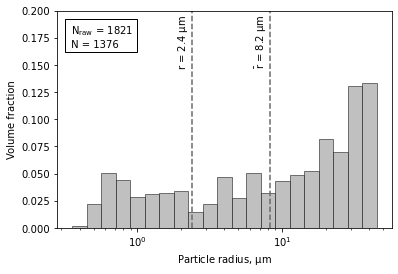

In [16]:
# Plots the total volume fraction for the whole thin section

ax= plt.figure()
y = [0, 0.5]
plt.hist(bins_lower,bins_lower, weights=average_vol_frac, \
         color = 'Silver', edgecolor='k', linewidth=0.5, density = False)
plt.xscale('log')

# Plots the mean values
plt.plot([2.4,2.4],y, linestyle = 'dashed', color = 'dimgray')
plt.plot([mean,mean],y, linestyle = 'dashed', color = 'dimgray')


plt.ylim(0,0.2)
plt.xlabel("Particle radius, $\mathregular{\mu}$m")
plt.ylabel("Volume fraction")
text = "$\mathregular{N_{raw}}$"
a = "$\bar{r}$"
b = "$\mathregular{\mu m}$"

ax.text(.15, .835, f" {text} = {total_particles_raw} \n N = \
{total_particles_used}", horizontalalignment="left", \
        verticalalignment="top", bbox=dict(boxstyle = "square", \
                                           facecolor = "white"))

ax.text(0.40,0.69,"r = 2.4 $\mathregular{\mu m}$", rotation=90)

ax.text(0.58,0.692,\
        r"$\mathregular{\bar{r}}$ = 8.2 $\mathregular{\mu m}$", rotation=90)
plt.savefig(f'{area_csv}_output/{area_csv}_combined_volume_fractions.eps')

In [17]:
# Writes the align DataFrame to .csv
align.to_csv(f'{area_csv}_output/{area_csv}_average_PSD.csv', index=False)  

In [18]:
# Finds volume bins from the particle radius
volbin = (4/3)*math.pi*(bins_lower)**3

# Multiplies by the volume fraction to find 
# the frequency of each particle 
get_f = average_vol_frac/volbin

In [19]:
# Normalises the frequency data for number density per volume
norm_f = get_f/sum(get_f)

In [20]:
# Calculates the geometric mean of the data

a = sum(get_f*np.log10(bins_mid))/sum(get_f)
mean = 10**a
mean

0.65114652757888

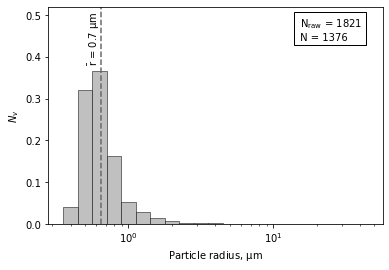

In [21]:
# Plots the normalised frequency data with the labelled mean

plt.hist(bins_lower,bins_lower, weights=norm_f, \
         color = 'Silver', edgecolor='k', \
         linewidth=0.5, density = False)
plt.xscale('log')
plt.plot([mean,mean],[0,0.7], linestyle = 'dashed', \
         color = 'dimgray')
plt.ylim(0,0.52)
plt.text(14.5, 0.495,f" {text} = {total_particles_raw} \n N = \
{total_particles_used}", horizontalalignment="left", \
         verticalalignment="top", bbox=dict(boxstyle = "square", \
                                            facecolor = "white"))

plt.text(0.52,0.39\
         ,r"$\mathregular{\bar{r}}$ = 0.7 $\mathregular{\mu m}$",\
         rotation=90)

plt.xlabel('Particle radius, $\mathregular{\mu m}$')
plt.ylabel('$N_v$')
plt.savefig(f'{area_csv}_output/{area_csv}_norm_freq.eps')